<a href="https://colab.research.google.com/github/Timofey59/ABC/blob/main/diplom_ziborov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Сбор данных

в этой работе использован датасет horse-or-human

загрузка архивов изображений

In [50]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/horse-or-human.zip  -O /tmp/horse-or-human.zip


--2023-12-09 19:18:22--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   149MB/s    in 1.0s    

2023-12-09 19:18:23 (149 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [51]:
import os
import zipfile

распаковка архивов изображений

In [68]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

## Подготовка данных

определение тренировочных каталогов для дальнейшей разметки изображений

In [69]:
# Каталог с тренировочным набором изображений лошадей
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Каталог с тренировочным набором изображений людей
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

переименование файлов тренировочных каталогов и вывод имен файлов после переименования (разметки)

In [70]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse39-5.png', 'horse12-0.png', 'horse25-7.png', 'horse05-8.png', 'horse09-4.png', 'horse38-5.png', 'horse38-1.png', 'horse23-9.png', 'horse33-4.png', 'horse08-5.png']
['human09-09.png', 'human15-10.png', 'human14-10.png', 'human05-18.png', 'human08-24.png', 'human07-01.png', 'human10-23.png', 'human06-26.png', 'human15-13.png', 'human07-20.png']


## Исследование данных

вывод на экран количества файлов в каталогах предназначенных для обучения. Качество исходных данных играет главенствующую роль в дальнейшей работе нейронной сети.

In [71]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Для просмотра изображений в обучающих каталогах настроим параметры библиотеки matplotlib

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Параметры вывода изображений на экран (4 х 4)
nrows = 4
ncols = 4

# Индекс для перебора изображений
pic_index = 0

посмотрим на несколько фотографий, чтобы лучше понять, с какими исходными изображениями будет работать модель


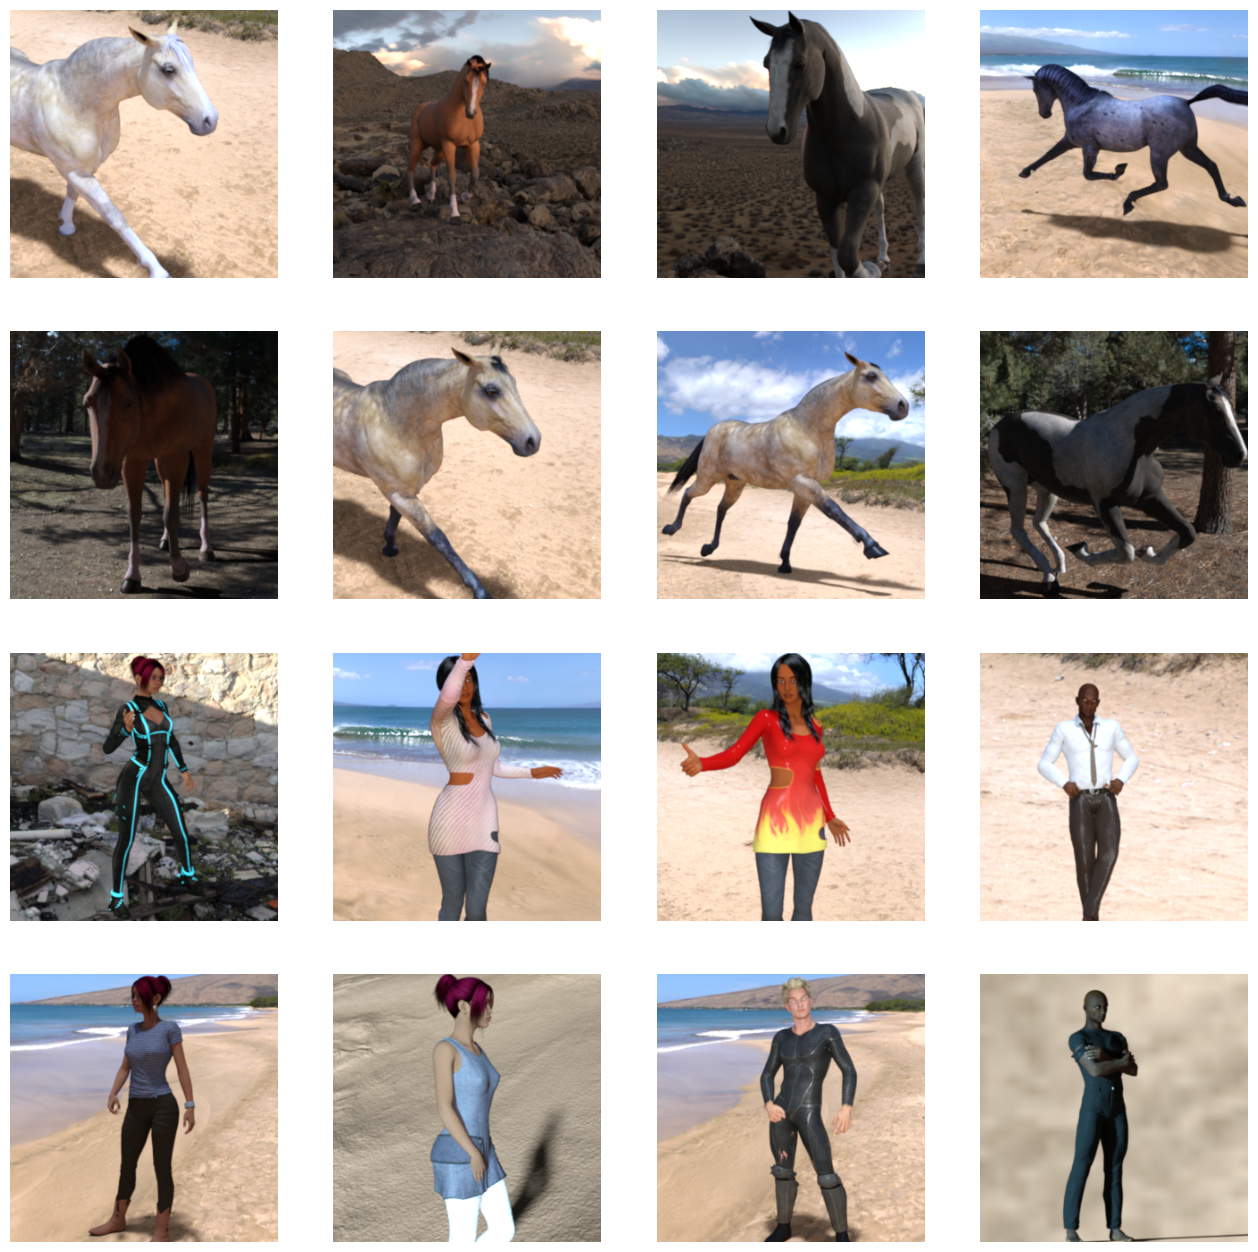

In [73]:
# Компонуем с помощью matplotlib форму и размер вывода на экран 4x4 изображений
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Отключаем отображение осей (или сетки)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Oпределяем архитектуру модели

импортируем библиотеку tensorflow

In [74]:
import tensorflow as tf

In [75]:
model = tf.keras.models.Sequential([
    # входная форма — это желаемый размер изображения 300x300 3 цветовых слоя
    # Это первая свертка
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Это вторая свертка
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Это третья свертка
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Это четвертая свертка
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Это пятая свертка
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Преобразование многомерных данных в одномерный массив
    tf.keras.layers.Flatten(),
    # Скрытый полносвязный слой с 512 нейронами и функцией активации "relu"
    tf.keras.layers.Dense(512, activation='relu'),
    # Только 1 выходной нейрон. Содержит значение 0-1, где 0 это один класс ('лошади') и 1 это другой ('люди')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Вызов метода model.summary() выводит сводку модели

далее видим сводную таблицу модели с ее парметрами

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 35, 35, 64)       

Столбец "Output shape" показывает, как меняется размер вашей карты объектов на каждом последующем слое. Слои свертки "Conv2D" немного уменьшают размер карт объектов из-за заполнения, и каждый объединяющий слой "MaxPooling2D" уменьшает размеры вдвое

## Компиляция модели

Алгоритм оптимизации RMSprop, поскольку RMSprop автоматизирует настройку скорости обучения. Шаг обучения "learning_rate" принимаем равным 0.001

In [77]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

## Обучение модели

Настраиваем генераторы данных (ImageDataGenerator), которые считывают изображения из исходных папок, преобразовывают их в тензоры float32 и передают их (с их метками) в сеть.

предварительно обработаем изображения, нормализовав значения пикселей, чтобы они находились в диапазоне [0, 1] (изначально все значения находятся в диапазоне [0, 255] )

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Все значения пикселей изображений нормализуются делением на 255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # Это исходная директория с тренировочным набором изображений
        target_size=(300, 300),  # Размер всех изображений изменяем до 150x150
        batch_size=128,
        # используя функцию потерь binary_crossentropy необходимо использовать бинарные метки (0 или 1) для задач бинарной классификации
        class_mode='binary')

Found 1027 images belonging to 2 classes.


Процесс обучение модели

In [79]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=19,
      verbose=1)

Epoch 1/19
8/8 [==============================] - 93s 13s/step - loss: 0.7097 - acc: 0.5184
Epoch 2/19
8/8 [==============================] - 91s 11s/step - loss: 0.7569 - acc: 0.5664
Epoch 3/19
8/8 [==============================] - 82s 10s/step - loss: 0.6705 - acc: 0.6318
Epoch 4/19
8/8 [==============================] - 80s 10s/step - loss: 0.6659 - acc: 0.7063
Epoch 5/19
8/8 [==============================] - 84s 10s/step - loss: 0.4363 - acc: 0.7942
Epoch 6/19
8/8 [==============================] - 81s 10s/step - loss: 0.4012 - acc: 0.8454
Epoch 7/19
8/8 [==============================] - 89s 10s/step - loss: 0.2650 - acc: 0.8954
Epoch 8/19
8/8 [==============================] - 81s 10s/step - loss: 0.1753 - acc: 0.9333
Epoch 9/19
8/8 [==============================] - 82s 10s/step - loss: 0.3151 - acc: 0.8810
Epoch 10/19
8/8 [==============================] - 80s 10s/step - loss: 0.1503 - acc: 0.9544
Epoch 11/19
8/8 [==============================] - 83s 10s/step - loss: 0.0906 

Потери "loss" и точность "ass"  являются показателем прогресса в обучении. Moдель делает предположение о классификации обучающих данных, а затем сопоставляет предположение с известной меткой и вычисляет результат. Точность – это доля правильных догадок

## Тестирование модели

Запускаем прогноз, используя модель. Код позволит выбрать один или несколько файлов из вашей файловой системы. Затем она загрузит их и прогонит через модель, дав понять, является ли объект лошадью или человеком.

Saving image4.jpg to image4 (2).jpg


1/1 [==============================] - 0s 167ms/step


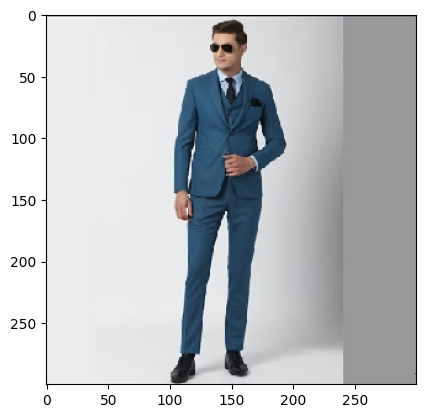

[1.]
image4 (2).jpg is a human


In [80]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # распознавание какого-либо изображения
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(img)
  plt.show()
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

## Визуализация результатов

Отображение результатов трансформации введенного изображения, когда оно проходит через слои обработки сверточной нейронной сети (CNN)

1/1 [==============================] - 0s 256ms/step


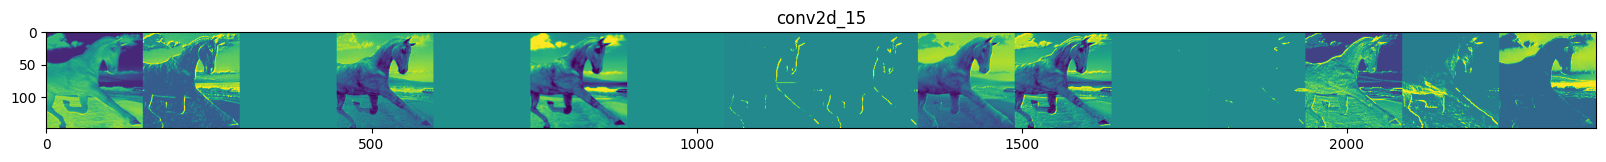

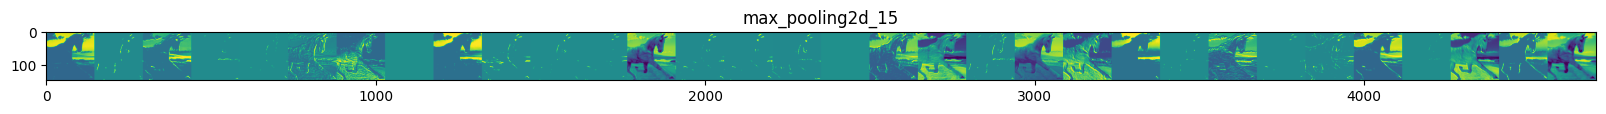

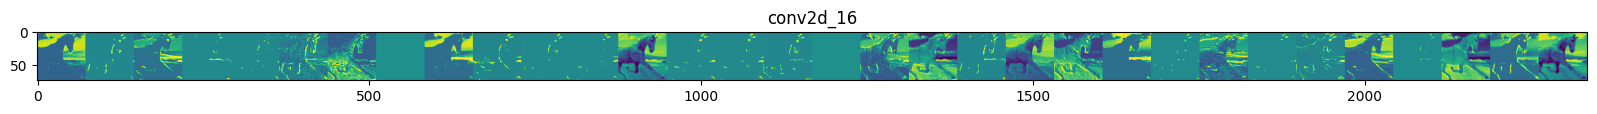

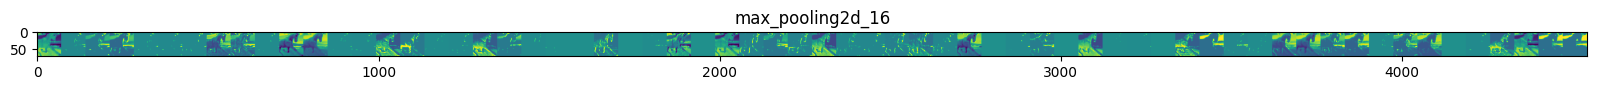

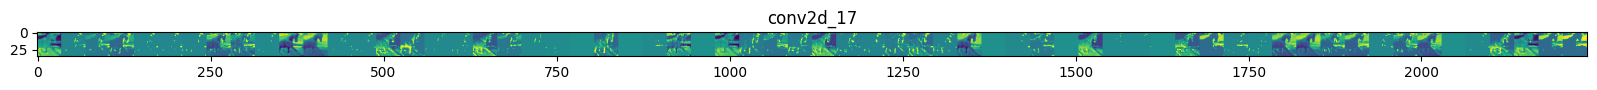

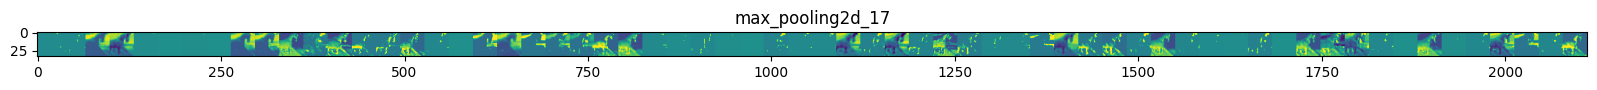

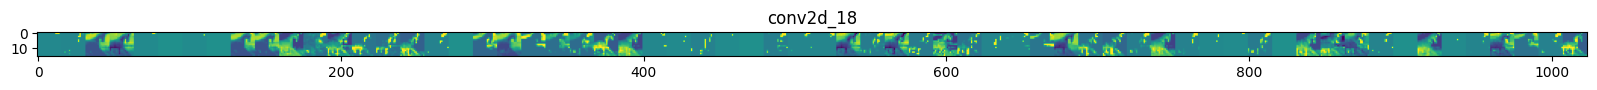

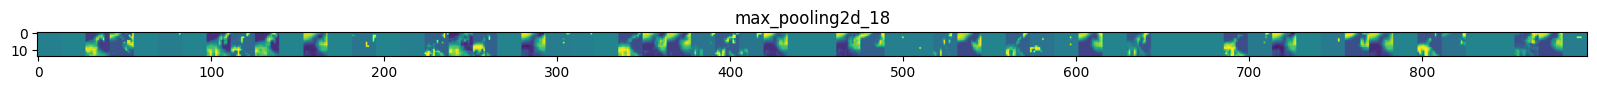

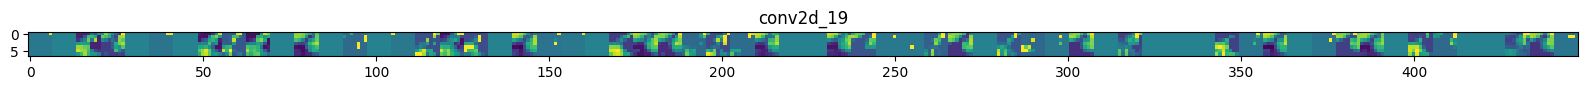

In [81]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# определим новую модель, которая будет принимать изображение в качестве входных данных и выводить
# промежуточные результаты обработки для всех слоев предыдущей модели
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# возьмем случайное изображение из тренировочного набора
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# нормализация значений пикселей изображения 1/255
x /= 255

# пропустим изображение через нашу сеть и получим все
# промежуточные результаты обработки этого изображения.
successive_feature_maps = visualization_model.predict(x)

# поименуем слои модели для подписей в визуализации результатов
layer_names = [layer.name for layer in model.layers]

# Визуализация результатов послойной обработки изображения
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # отображаем обработку для conv / maxpool слоем, но не для полносвязных
    n_features = feature_map.shape[-1]  # количество объектов на карте объектов
    # Карта объектов имеет форму (1, size, size, n_features)
    size = feature_map.shape[1]
    # разложим наши изображения по этой матрице
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Постобработка объекта, для его комфортного восприятия
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # разместим каждый фильтр в этой большой горизонтальной сетке
      display_grid[:, i * size : (i + 1) * size] = x
    # отображение сетки
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Как видно, происходит переход от необработанных пикселей изображения ко все более абстрактным и компактным представлениям. Представления постепенно начинают выделять то, на что сеть обращает внимание, и показывается все меньше и меньше признаков, которые «активируются».

Эти представления несут все меньше информации об исходных пикселях изображения, но все больше уточняют информацию о классе изображения. Можно думать о CNN (или о глубокой сети в целом) как о конвейере дистилляции информации.